<a href="https://colab.research.google.com/github/Riswanpk/LGMVIP-DataScience-Task-Number/blob/main/Task_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 02 : STOCK MARKET PREDICTION & FORECASTING USING STACKED LSTM

**Step 01 : Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

**Step 02 : Loading the Dataset**

In [2]:
data=pd.read_csv('stock_data.csv')

**Step 03 : Preprocess The Data**

In [3]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data['Close'].values.reshape(-1,1))

**Step 04 : Split Data into Training & Testing sets**

In [4]:
train_size=int(len(scaled_data)*0.8)
train_data=scaled_data[:train_size]
test_data=scaled_data[train_size:]

**Step 05 : Prepare data for LSTM**

In [5]:
def create_dataset(dataset,time_steps=1):
  x,y=[],[]
  for i in range(len(dataset)-time_steps-1):
    x.append(dataset[i:(i+time_steps),0])
    y.append(dataset[i+time_steps,0])
  return np.array(x),np.array(y)

In [6]:
time_steps=10
x_train,y_train=create_dataset(train_data,time_steps)
x_test,y_test=create_dataset(test_data,time_steps)

**Step 06 : Reshape input data for LSTM**

In [7]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

**Step 07 : Build the stacked LSTM model**

In [8]:
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')

**Step 08 : Train the model**

In [9]:
model.fit(x_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
51/51 [==============================] - 3s 8ms/step - loss: 0.0222
Epoch 2/50
51/51 [==============================] - 0s 8ms/step - loss: 9.1986e-04
Epoch 3/50
51/51 [==============================] - 0s 8ms/step - loss: 9.0483e-04
Epoch 4/50
51/51 [==============================] - 0s 8ms/step - loss: 8.3309e-04
Epoch 5/50
51/51 [==============================] - 0s 7ms/step - loss: 8.7583e-04
Epoch 6/50
51/51 [==============================] - 0s 8ms/step - loss: 8.3429e-04
Epoch 7/50
51/51 [==============================] - 0s 8ms/step - loss: 8.0974e-04
Epoch 8/50
51/51 [==============================] - 0s 8ms/step - loss: 8.3321e-04
Epoch 9/50
51/51 [==============================] - 0s 8ms/step - loss: 8.0394e-04
Epoch 10/50
51/51 [==============================] - 0s 8ms/step - loss: 7.7699e-04
Epoch 11/50
51/51 [==============================] - 0s 8ms/step - loss: 7.4148e-04
Epoch 12/50
51/51 [==============================] - 0s 8ms/step - loss: 7.4591e-04
Epoch

**Step 09 : Make predictions on the test data**

In [10]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

13/13 [==============================] - 1s 2ms/step


**Step 10 : Printing the predicted values**

In [35]:
print('Predicted Values : ')
print(predictions)

Predicted Values : 
[[118.14252 ]
 [118.385445]
 [119.013245]
 [119.56305 ]
 [119.84013 ]
 [120.1495  ]
 [119.51188 ]
 [120.23023 ]
 [119.26721 ]
 [116.77695 ]
 [115.595215]
 [116.3281  ]
 [114.18913 ]
 [111.79135 ]
 [109.65032 ]
 [105.25686 ]
 [101.47978 ]
 [ 98.51874 ]
 [ 96.145035]
 [ 94.33472 ]
 [ 93.43404 ]
 [ 93.43917 ]
 [ 93.46037 ]
 [ 94.67114 ]
 [ 96.265305]
 [ 96.28348 ]
 [ 95.482796]
 [ 94.64344 ]
 [ 94.30933 ]
 [ 93.99001 ]
 [ 93.850174]
 [ 93.85527 ]
 [ 93.795044]
 [ 94.38255 ]
 [ 94.76058 ]
 [ 93.96212 ]
 [ 92.80754 ]
 [ 91.86866 ]
 [ 90.55175 ]
 [ 89.645164]
 [ 89.31274 ]
 [ 89.26378 ]
 [ 89.63422 ]
 [ 89.118225]
 [ 88.12643 ]
 [ 87.10271 ]
 [ 86.84713 ]
 [ 87.798035]
 [ 88.27476 ]
 [ 88.829926]
 [ 88.92431 ]
 [ 89.409386]
 [ 89.89199 ]
 [ 90.517876]
 [ 90.93321 ]
 [ 91.48778 ]
 [ 90.99191 ]
 [ 89.172356]
 [ 87.47834 ]
 [ 86.20351 ]
 [ 84.84719 ]
 [ 84.07783 ]
 [ 83.34295 ]
 [ 83.27712 ]
 [ 83.27341 ]
 [ 83.454506]
 [ 83.610176]
 [ 84.013   ]
 [ 84.91887 ]
 [ 86.24761 ]


**Step 11 : Visualizing the Results**

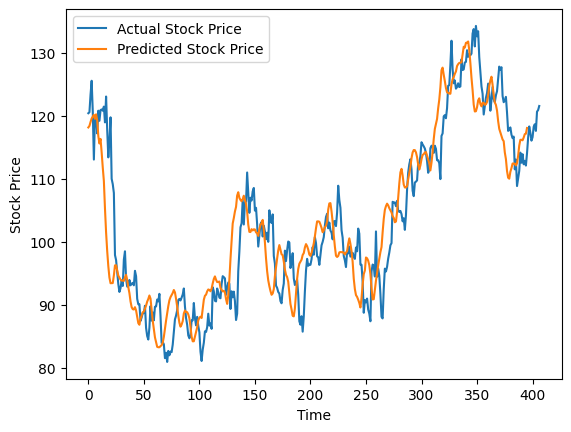

In [11]:
plt.plot(scaler.inverse_transform(test_data),label='Actual Stock Price')
plt.plot(predictions,label='Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()